In [8]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image
import keras.utils as image

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,classification_report
import matplotlib.pyplot as plt

In [10]:
path = 'C:/Users/ArnabBiswas/Documents/Data/Kaggle Dataset/cnn-data/nike-addidas/'

modelName = "savedModels/model-cnn-nike-addidas-2.h5"

In [3]:
def prepare_data():
    #As each pixel takes value from 0 to 255, we normalize by dividing all of them by 255
    train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                       horizontal_flip=True)
    
    training_set = train_datagen.flow_from_directory(path+'train', target_size=(64,64), batch_size=32,
                                                    class_mode='binary')    
    
    
    validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                       horizontal_flip=True)    
    
    validation_set = validation_datagen.flow_from_directory(path+'validation', target_size=(64,64), batch_size=32,
                                                    class_mode='binary')
    
    #Encode the result
    print(training_set.class_indices)
    
    return training_set, validation_set

In [4]:
def train_cnn_model(training_set, validation_set):
    
    #Initializing the CNN
    cnn = tf.keras.models.Sequential()
    
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3,
                                   input_shape=[64,64,3]))
    #pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    
    
    #Adding a second convolution layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3))
    #pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    
    #Flattening 
    cnn.add(tf.keras.layers.Flatten())
    
    # Add a fully connected layer
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
    
    #Output layer
    cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    
    #Compiling the CNN
    cnn.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])
    
    #Training the CNN
    cnn.fit(x= training_set, validation_data=validation_set, epochs=50)

    cnn.save(modelName)

In [13]:
def load_model(modelName):
    cnn = tf.keras.models.load_model(modelName)
    return cnn


def test_cnn_image(cnn,imgPath):    
    
    # Make as ingle prediction
    test_image = image.load_img(imgPath, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    
    # Adding a fake/extra dimension
    test_image = np.expand_dims(test_image, axis=0)
    
    # Getting prediction 
    result = cnn.predict(test_image)
            
    return int(result[0])

In [14]:
training_set, validation_set = prepare_data()

Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
{'adidas': 0, 'nike': 1}


In [15]:
train_cnn_model(training_set, validation_set)

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
15/15 [==============================] - 11s 682ms/step - loss: 0.7160 - accuracy: 0.5043 - val_loss: 0.6873 - val_accuracy: 0.5636
Epoch 2/50
15/15 [==============================] - 2s 164ms/step - loss: 0.6779 - accuracy: 0.6304 - val_loss: 0.6762 - val_accuracy: 0.5455
Epoch 3/50
15/15 [==============================] - 2s 167ms/step - loss: 0.6443 - accuracy: 0.6261 - val_loss: 0.6576 - val_accuracy: 0.6000
Epoch 4/50
15/15 [==============================] - 3s 170ms/step - loss: 0.6279 - accuracy: 0.6630 - val_loss: 0.7156 - val_accuracy: 0.5818
Epoch 5/50
15/15 [==============================] - 3s 172ms/step - loss: 0.5910 - accuracy: 0.6761 - val_loss: 0.6464 - val_accuracy: 0.5818
Epoch 6/50
15/15 [==============================] - 2s 166ms/step - loss: 0.5639 - accuracy: 0.7196 - val_loss: 0.7070 - val_accuracy: 0.6727
Epoch 7/50
15/15 [==============================] - 2s 167ms/step - loss: 0.5352 - accuracy: 0.7370 - val_loss: 0.7293 - val_accuracy: 0.6545
Epoch

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
cnn = load_model(modelName)

In [18]:
def test_cnn_image(cnn,imgPath):    
    
    # Make as ingle prediction
    test_image = image.load_img(imgPath, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    
    # Adding a fake/extra dimension
    test_image = np.expand_dims(test_image, axis=0)
    
    # Getting prediction 
    result = cnn.predict(test_image)
            
    return int(result[0][0])


#%%
def test_model():
    actual = []
    prediction = []
    
    for filename in os.listdir(path+'test/adidas/'):
        p = test_cnn_image(cnn,path+'test/adidas/'+str(filename))
        prediction.append(p)
        actual.append(0)
    
    for filename in os.listdir(path+'test/nike/'):
        p = test_cnn_image(cnn,path+'test/nike/'+str(filename))
        prediction.append(p)
        actual.append(1)
    
    print(confusion_matrix(actual, prediction))
    print(classification_report(actual, prediction))
    fpr, tpr, thresholds = roc_curve(actual, prediction)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print("AUC score = {} ".format(roc_auc_score(actual, prediction)))

1/1 [==============================] - 0s 32ms/step
[[13 17]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.59      0.80      0.68        30

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.60        60
weighted avg       0.63      0.62      0.60        60

AUC score = 0.6166666666666667 


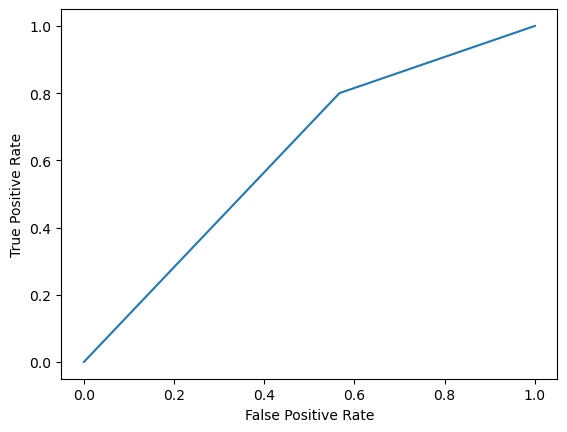

In [19]:
test_model()